# Recurrent Layer of Keras

<br />

There are some recurrent layers of Keras including RNN, SimpleRNN, GRU, LSTM, ConvLSTM2D, SimpleRNNCell, GRUCell, LSTMCell, StackedRNNCells, CuDNNGRU and CuDNNLSTM.


http://pynote.hatenablog.com/entry/jupyter-notebook-nbextensions

## [Task 1] Run Methods

### LSTM


https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 157s 6ms/step - loss: 0.4638 - acc: 0.7808 - val_loss: 0.3908 - val_acc: 0.8302
Epoch 2/15
25000/25000 [==============================] - 151s 6ms/step - loss: 0.3078 - acc: 0.8725 - val_loss: 0.4211 - val_acc: 0.8084
Epoch 3/15
25000/25000 [==============================] - 151s 6ms/step - loss: 0.2238 - acc: 0.9111 - val_loss: 0.4348 - val_acc: 0.8286
Epoch 4/15
25000/25000 [==============================] - 151s 6ms/st

### ConvLSTM2D

https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py

Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 113s 119ms/step - loss: 0.2581 - val_loss: 0.0618
Epoch 2/10
950/950 [==============================] - 109s 115ms/step - loss: 0.0183 - val_loss: 0.0101
Epoch 3/10
950/950 [==============================] - 109s 114ms/step - loss: 0.0129 - val_loss: 0.0045
Epoch 4/10
950/950 [==============================] - 109s 115ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5/10
950/950 [==============================] - 109s 114ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/10
950/950 [==============================] - 109s 115ms/step - loss: 7.2376e-04 - val_loss: 7.3168e-04
Epoch 7/10
950/950 [==============================] - 109s 114ms/step - loss: 5.7216e-04 - val_loss: 5.1128e-04
Epoch 8/10
950/950 [==============================] - 109s 114ms/step - loss: 4.8040e-04 - val_loss: 4.6878e-04
Epoch 9/10
950/950 [==============================] - 109s 115ms/step - loss: 4.3239e-04 - val_loss

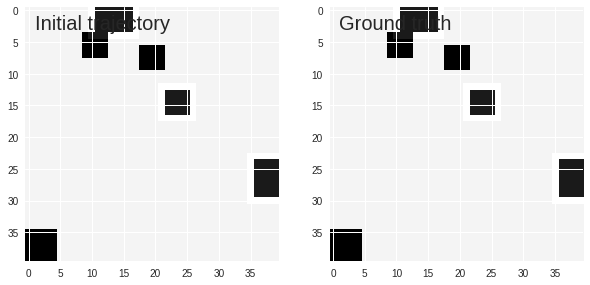

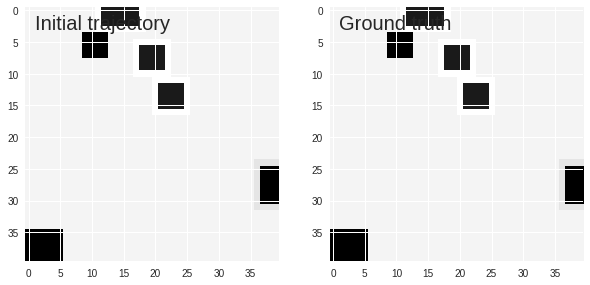

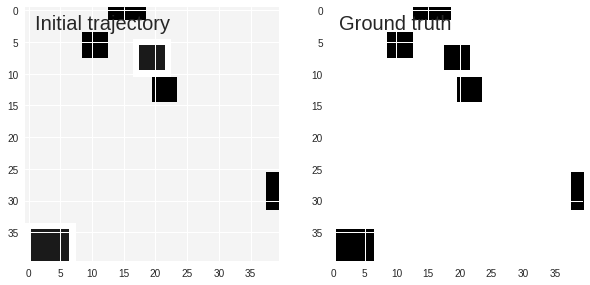

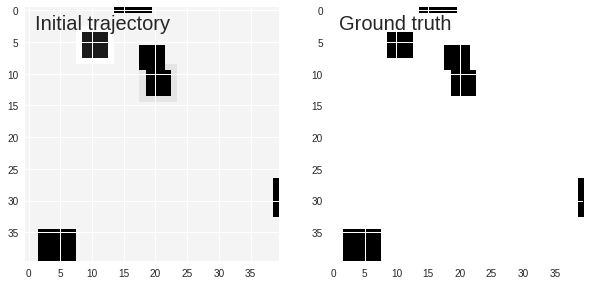

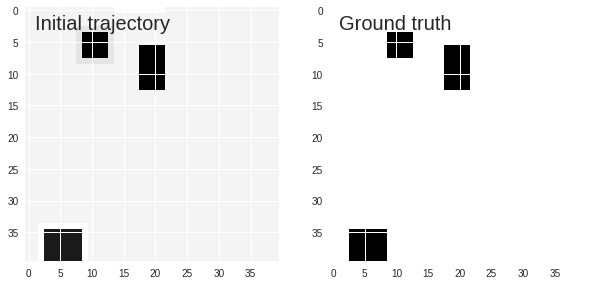

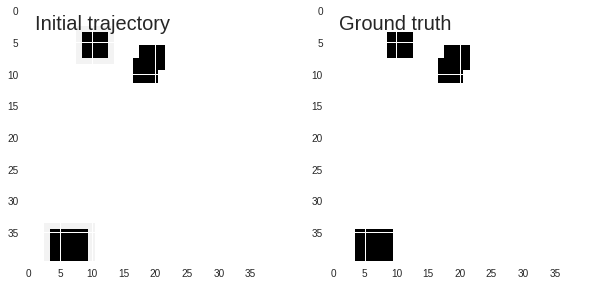

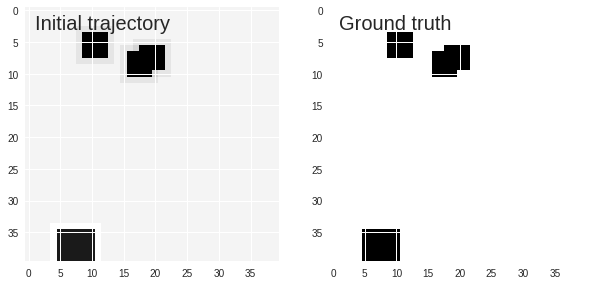

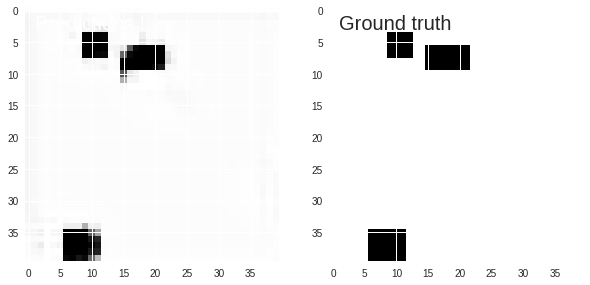

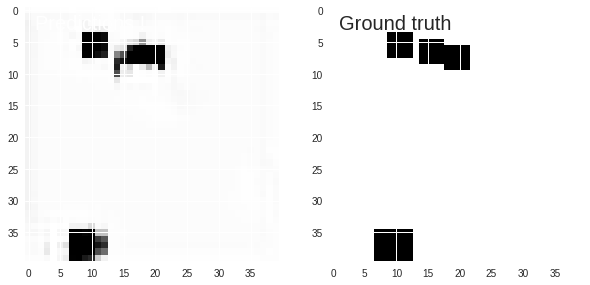

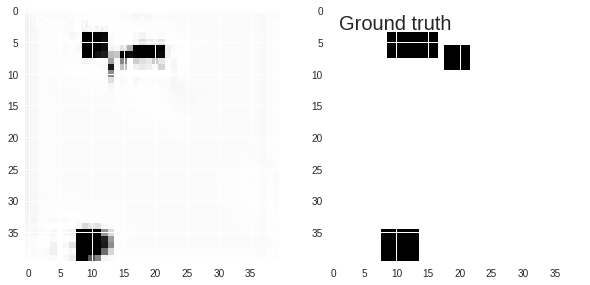

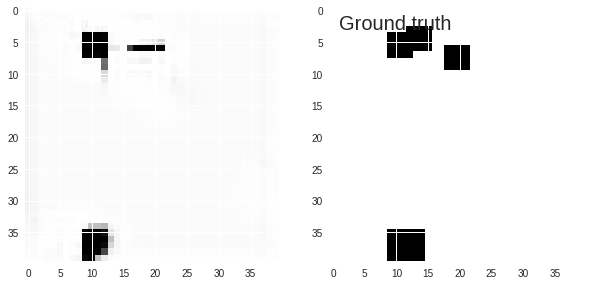

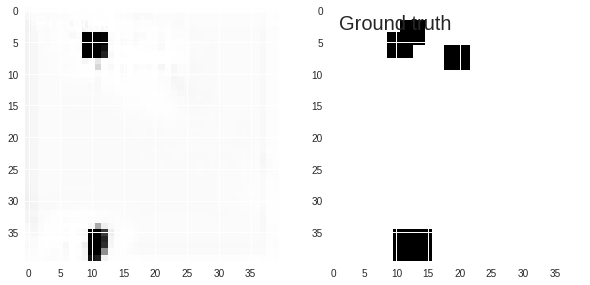

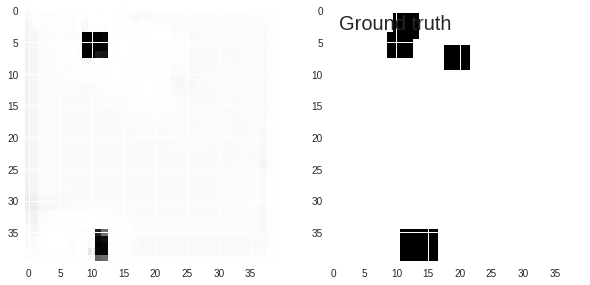

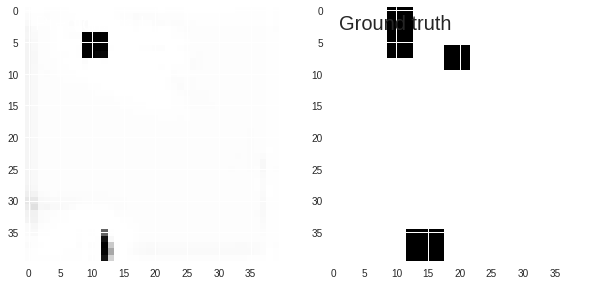

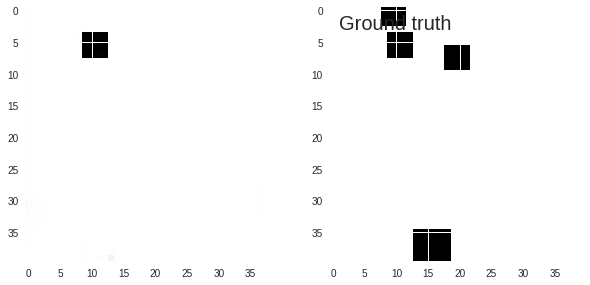

In [4]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### RNN by Self-Made Cell

In [0]:
import keras
from keras.layers import RNN
from keras import backend as K

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        # Weight of input
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        # Weight of state
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

In [0]:
min_rnn_cell = MinimalRNNCell(32)

In [18]:
print('Build model...')
rnn = Sequential()
rnn.add(Embedding(max_features, 128))
rnn.add(RNN(min_rnn_cell))
rnn.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
rnn_score, rnn_acc = rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', rnn_score)
print('Test accuracy:', rnn_acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4850 - acc: 0.7606 - val_loss: 0.3997 - val_acc: 0.8154
Epoch 2/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2961 - acc: 0.8781 - val_loss: 0.3963 - val_acc: 0.8312
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2038 - acc: 0.9212 - val_loss: 0.4553 - val_acc: 0.8066
Epoch 4/5
25000/25000 [==============================] - 29s 1ms/step - loss: 0.1462 - acc: 0.9453 - val_loss: 0.5808 - val_acc: 0.8149
Epoch 5/5
25000/25000 [==============================] - 5s 202us/step
Test score: 0.7328647745573521
Test accuracy: 0.80176


### SimpleRNN

In [19]:
from keras.layers import SimpleRNN

print('Build model...')
simple_rnn = Sequential()
simple_rnn.add(Embedding(max_features, 128))
simple_rnn.add(SimpleRNN(32))
simple_rnn.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simple_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simple_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
simple_rnn_score, simple_rnn_acc = simple_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', simple_rnn_score)
print('Test accuracy:', simple_rnn_acc)


Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.5253 - acc: 0.7274 - val_loss: 0.4589 - val_acc: 0.8022
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/step - loss: 0.2676 - acc: 0.8939 - val_loss: 0.4616 - val_acc: 0.7908
Epoch 3/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.1024 - acc: 0.9658 - val_loss: 0.5919 - val_acc: 0.8112
Epoch 4/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0433 - acc: 0.9859 - val_loss: 0.7328 - val_acc: 0.7907
Epoch 5/5
25000/25000 [==============================] - 6s 242us/step
Test score: 0.7965978992938996
Test accuracy: 0.79272


### GRU

In [20]:
from keras.layers import GRU

print('Build model...')
gru = Sequential()
gru.add(Embedding(max_features, 128))
gru.add(GRU(32))
gru.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
gru.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
gru.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
gru_score, gru_acc = gru.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', gru_score)
print('Test accuracy:', gru_acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.4303 - acc: 0.7948 - val_loss: 0.3704 - val_acc: 0.8341
Epoch 2/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.2439 - acc: 0.9034 - val_loss: 0.3827 - val_acc: 0.8391
Epoch 3/5
25000/25000 [==============================] - 106s 4ms/step - loss: 0.1480 - acc: 0.9456 - val_loss: 0.4357 - val_acc: 0.8325
Epoch 4/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.0846 - acc: 0.9707 - val_loss: 0.5342 - val_acc: 0.8241
Epoch 5/5
25000/25000 [==============================] - 18s 714us/step
Test score: 0.7247676249194145
Test accuracy: 0.8148


### SimpleRNNCell

In [21]:
from keras.layers import SimpleRNNCell

simple_rnn_cell = SimpleRNNCell(32)

print('Build model...')
simple_rnn2 = Sequential()
simple_rnn2.add(Embedding(max_features, 128))
simple_rnn2.add(RNN(simple_rnn_cell))
simple_rnn2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simple_rnn2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simple_rnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
simple_rnn2_score, simple_rnn2_acc = simple_rnn2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', simple_rnn2_score)
print('Test accuracy:', simple_rnn2_acc)



Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 40s 2ms/step - loss: 0.4727 - acc: 0.7741 - val_loss: 0.3943 - val_acc: 0.8276
Epoch 2/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2635 - acc: 0.8974 - val_loss: 0.4260 - val_acc: 0.8241
Epoch 3/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.1192 - acc: 0.9590 - val_loss: 0.5237 - val_acc: 0.8059
Epoch 4/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0438 - acc: 0.9868 - val_loss: 0.7030 - val_acc: 0.8107
Epoch 5/5
25000/25000 [==============================] - 6s 243us/step
Test score: 0.7579866423034668
Test accuracy: 0.7832


### GRUCell

In [23]:
from keras.layers import GRUCell

gru_cell = GRUCell(32)

print("Build model...")
gru2 = Sequential()
gru2.add(Embedding(max_features, 128))
gru2.add(RNN(gru_cell))
gru2.add(Dense(1, activation="sigmoid"))

# try using different optimizers and different optimizer configs
gru2.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

print("Train...")
gru2.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=5,
        validation_data=(x_test, y_test))
gru2_score, gru2_acc = gru2.evaluate(x_test, y_test,
                          batch_size=batch_size)
print("Test score:", gru2_score)
print("Test accuracy:", gru2_acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 110s 4ms/step - loss: 0.4354 - acc: 0.7918 - val_loss: 0.3652 - val_acc: 0.8406
Epoch 2/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.2505 - acc: 0.9000 - val_loss: 0.3733 - val_acc: 0.8344
Epoch 3/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1548 - acc: 0.9441 - val_loss: 0.5050 - val_acc: 0.8224
Epoch 4/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.0924 - acc: 0.9678 - val_loss: 0.5381 - val_acc: 0.8178
Epoch 5/5
25000/25000 [==============================] - 18s 715us/step
Test score: 0.6660330042517185
Test accuracy: 0.8216


### LSTMCell

In [24]:
from keras.layers import LSTMCell

lstm_cell = LSTMCell(32)

lstm2 = Sequential()
lstm2.add(Embedding(max_features, 128))
lstm2.add(RNN(lstm_cell))
lstm2.add(Dense(1, activation="sigmoid"))

lstm2.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

lstm2.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=5,
         validation_data=(x_test, y_test))

lstm2_score, lstm2_acc = lstm2.evaluate(x_test, y_test,
                           batch_size=batch_size)

print("Test score:", lstm2_score)
print("Test accuracy:", lstm2_acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 133s 5ms/step - loss: 0.4226 - acc: 0.8021 - val_loss: 0.3547 - val_acc: 0.8435
Epoch 2/5
25000/25000 [==============================] - 130s 5ms/step - loss: 0.2415 - acc: 0.9042 - val_loss: 0.3800 - val_acc: 0.8408
Epoch 3/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.1500 - acc: 0.9444 - val_loss: 0.5031 - val_acc: 0.8222
Epoch 4/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.0921 - acc: 0.9670 - val_loss: 0.5169 - val_acc: 0.8212
Epoch 5/5
25000/25000 [==============================] - 23s 914us/step
Test score: 0.7827411028528214
Test accuracy: 0.80664


### StackedRNNCells

In [26]:
from keras.layers import StackedRNNCells

output_dim = 32

stacked_rnn_cells = [
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
    keras.layers.LSTMCell(output_dim),
]

stacked_rnn = Sequential()
stacked_rnn.add(Embedding(max_features, 128))
stacked_rnn.add(RNN(stacked_rnn_cells))
stacked_rnn.add(Dense(1, activation="sigmoid"))

stacked_rnn.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

stacked_rnn.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=5,
         validation_data=(x_test, y_test))

stacked_rnn_score, stacked_rnn_acc = stacked_rnn.evaluate(x_test, y_test,
                           batch_size=batch_size)

print("Test score:", stacked_rnn_score)
print("Test accuracy:", stacked_rnn_acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 340s 14ms/step - loss: 0.4291 - acc: 0.7917 - val_loss: 0.3613 - val_acc: 0.8375
Epoch 2/5
25000/25000 [==============================] - 335s 13ms/step - loss: 0.2366 - acc: 0.9064 - val_loss: 0.3710 - val_acc: 0.8336
Epoch 3/5
25000/25000 [==============================] - 331s 13ms/step - loss: 0.1426 - acc: 0.9473 - val_loss: 0.4755 - val_acc: 0.8228
Epoch 4/5
25000/25000 [==============================] - 333s 13ms/step - loss: 0.0848 - acc: 0.9698 - val_loss: 0.6580 - val_acc: 0.8162
Epoch 5/5
25000/25000 [==============================] - 61s 2ms/step
Test score: 0.7138905826568603
Test accuracy: 0.8196


### CuDNNGRU

In [27]:
from keras.layers import CuDNNGRU

cudnn_gru = Sequential()
cudnn_gru.add(Embedding(max_features, 128))
cudnn_gru.add(CuDNNGRU(32))
cudnn_gru.add(Dense(1, activation="sigmoid"))

cudnn_gru.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

cudnn_gru.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=5,
         validation_data=(x_test, y_test))

cudnn_gru_score, cudnn_gru_acc = stacked_rnn.evaluate(x_test, y_test,
                           batch_size=batch_size)

print("Test score:", cudnn_gru_score)
print("Test accuracy:", cudnn_gru_acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 22s 884us/step - loss: 0.4374 - acc: 0.7897 - val_loss: 0.3772 - val_acc: 0.8306
Epoch 2/5
25000/25000 [==============================] - 18s 733us/step - loss: 0.2478 - acc: 0.9012 - val_loss: 0.3763 - val_acc: 0.8416
Epoch 3/5
25000/25000 [==============================] - 19s 741us/step - loss: 0.1459 - acc: 0.9460 - val_loss: 0.4458 - val_acc: 0.8358
Epoch 4/5
25000/25000 [==============================] - 18s 732us/step - loss: 0.0764 - acc: 0.9752 - val_loss: 0.5877 - val_acc: 0.8241
Epoch 5/5
25000/25000 [==============================] - 60s 2ms/step
Test score: 0.7138905826568603
Test accuracy: 0.8196


### CuDNNLSTM

In [28]:
from keras.layers import CuDNNLSTM

cudnn_lstm = Sequential()
cudnn_lstm.add(Embedding(max_features, 128))
cudnn_lstm.add(CuDNNLSTM(32))
cudnn_lstm.add(Dense(1, activation="sigmoid"))

cudnn_lstm.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

cudnn_lstm.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=5,
         validation_data=(x_test, y_test))

cudnn_lstm_score, cudnn_lstm_acc = stacked_rnn.evaluate(x_test, y_test,
                           batch_size=batch_size)

print("Test score:", cudnn_lstm_score)
print("Test accuracy:", cudnn_lstm_acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 22s 878us/step - loss: 0.4196 - acc: 0.8043 - val_loss: 0.3540 - val_acc: 0.8441
Epoch 2/5
25000/25000 [==============================] - 19s 748us/step - loss: 0.2419 - acc: 0.9048 - val_loss: 0.3702 - val_acc: 0.8382
Epoch 3/5
25000/25000 [==============================] - 19s 742us/step - loss: 0.1498 - acc: 0.9442 - val_loss: 0.4272 - val_acc: 0.8337
Epoch 4/5
25000/25000 [==============================] - 19s 748us/step - loss: 0.0945 - acc: 0.9662 - val_loss: 0.5725 - val_acc: 0.8250
Epoch 5/5
25000/25000 [==============================] - 60s 2ms/step
Test score: 0.7138905826568603
Test accuracy: 0.8196


## [Task 2] Explanations of Comparison Results

<br />

I am going to explain 11 elements on the following website, and compare the above results.


https://client.diveintocode.jp/curriculums/1470

- RNN

    - Base class for Recurrent layers

<br />

- SimpleRNN

    - Fully Connected RNN where outputs are feedbacked to inputs

<br />

- GRU

    - Recurrent units where there are gates

<br />

- LSTM

    - Long short term units

<br />

- ConvLSTM2D

    - Convolutional LSTM

<br />

- SimpleRNNCell

    - Cell class of SimpleRNNCell

<br />

- GRUCell

    - Cell class of GRUCell

<br />

- LSTMCell

    - Cell class of LSTMCell

<br />

- StackedRNNCells

    - Rapper for making a performance of a stack of RNN cells a performance of a single cell

<br />

- CuDNNGRU

    - High-speed implementation of GRU with use of CuDNN

<br />

- CuDNNLSTM

    - High-speed implementation of LSTM with use of CuDNN

In [4]:
import pandas as pd

columns = ["Time per Epoch", "val_loss", "val_acc"]
index = ["RNN (by Self-Made Cell)", "SimpleRNN", "GRU", "LSTM", "SimpleRNNCell", "GRUCell", "LSTMCell", "StackedRNNCells", 
         "CuDNNGRU", "CuDNNLSTM"]

data = [[33, 0.3997, 0.8154], 
        [39, 0.4589, 0.8022], 
        [109, 0.3704, 0.8341], 
        [157, 0.3908, 0.8302], 
        [40, 0.3943, 0.8276], 
        [110, 0.3652, 0.8406], 
        [133, 0.3547, 0.8435], 
        [340, 0.3613, 0.8375], 
        [22, 0.3772, 0.8306], 
        [22, 0.3540, 0.8441]]

In [5]:
df = pd.DataFrame(data, columns=columns, index=index)

In [6]:
df

,Time per Epoch,val_loss,val_acc
RNN (by Self-Made Cell),33,0.3997,0.8154
SimpleRNN,39,0.4589,0.8022
GRU,109,0.3704,0.8341
LSTM,157,0.3908,0.8302
SimpleRNNCell,40,0.3943,0.8276
GRUCell,110,0.3652,0.8406
LSTMCell,133,0.3547,0.8435
StackedRNNCells,340,0.3613,0.8375
CuDNNGRU,22,0.3772,0.8306
CuDNNLSTM,22,0.3540,0.8441


    - CuDNNGRU and CuDNNLSTM are fast because they are run on GPU.
    
    - SimpleRNN is also fast.
    
    - This time, I used a self-made cell on the "RNN" task. So, RNN is fast. too.
    
    - It is difficult to evaluate performances of those models because the dataset might not be appropriate, and/or they are overfitting. However, I guess that LSTM is a great model because of the high accuracy.